In [3]:
# we are going to generate Coordinates on x.y plain and then we will define
# which point is in the inner circle and which point is in the outer circle
# FOR That we will use sklearn dataset
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
# Making 1000 samples
n_samples = 1000

X, y = make_circles(n_samples, noise=0.04, random_state=42)
circles = pd.DataFrame({"X1":X[:,0], "X2":X[:,1], "label":y})

/var/folders/c1/2427ftdx5ygdz14g2mx8qjtw0000gn/T/ipykernel_40264/1693645188.py:7: RuntimeWarning: invalid value encountered in sqrt
  y2 = np.sqrt(0.64- x2**2)


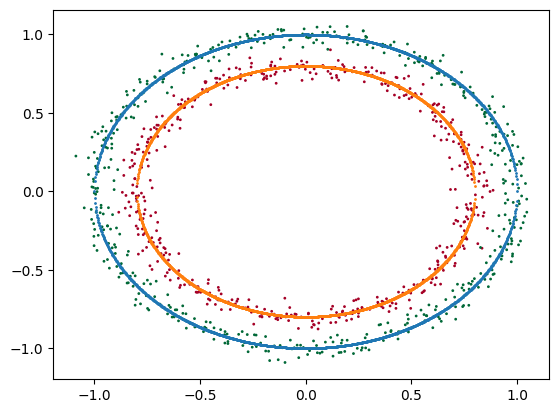

In [4]:
# The Below are just for drawing circle to visualise.....

x1 = np.linspace(-1, 1, 2000)
y1 = np.sqrt(1- x1**2)
y1[1::2] *= -1
x2 = np.linspace(-0.8, 0.8, 2000)
y2 = np.sqrt(0.64- x2**2)
y2[1::2] *= -1

plt.scatter(x=X[:,0], y=X[:,1], s =1, c=y, cmap=plt.cm.RdYlGn_r)

plt.scatter(x=x1, y=y1, s=1, )
plt.scatter(x=x2, y=y2, s=1, )


### Preparing data for training

In [5]:
# now for turning panda data into tensor we need torch module.

# the question is why we are changing the dataType to torch.float
# This is because the default Type of NumPy is float64 while torch having float32
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

print(type(y))

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print(type(X_train))



<class 'torch.Tensor'>
<class 'torch.Tensor'>


### <font color=green>An Overview of Building Model</font>

#### <mark>Our Goal is to build a model that can classify our blue and weather circle is inner or outer</mark>
#### <font color="#e0c6b1" >1. Setup device-agnostic code so our code will run on an accelerator (GPU) if there is one</font>
#### <font color="#e0c6b1" >2. Construct a model (by subclassing `nn.Module`)</font>
#### <font color="#e0c6b1" >3. Define a ***loss*** function and optimizer</font>
#### <font color="#e0c6b1" >4. And will create a training and test loop</font>

<img src="markdown_Images/pathOverView.png" width=900>


### Now Lets setting up the code
1. Subclass `nn.Module`(almost all models in PyTorch subclass `nn.Module`)
2. Creating 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Defines a `forward()` method that outlines the forward pass (or forward computation) of the model
4. instantiate an instance of out model class and send it to the target `device`

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"
# as I am on Macbook M1 chip there is an inbuilt GPU now supported by PyTorch "mps"
# device = torch.device("mps")
class DotClassification(nn.Module):
    def __init__(self):
        super().__init__()
        # creating layers in model
        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)

    def forward(self, x):
        return self.layer_2(self.layer_1(x))

# Instantiating the model now
model_0 = DotClassification().to(device)
model_0

DotClassification(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [7]:


print(y[:5])
torch.round(model_0(X_test[:5]))
model_0.state_dict()

tensor([1., 1., 1., 1., 0.])


OrderedDict([('layer_1.weight',
              tensor([[-0.6603,  0.2233],
                      [-0.4787, -0.2065],
                      [ 0.1668,  0.3366],
                      [-0.6228,  0.3121],
                      [-0.1715, -0.1680]])),
             ('layer_1.bias',
              tensor([-0.4426, -0.6102, -0.2215, -0.6902, -0.2497])),
             ('layer_2.weight',
              tensor([[-0.0566, -0.0133,  0.3379, -0.4052, -0.0071]])),
             ('layer_2.bias', tensor([-0.0582]))])

In [1]:
# epochs = 200
#
# for epoch in range(epochs):
import torch
print(dir(torch))

['AVG', 'AggregationType', 'AliasDb', 'Any', 'AnyType', 'Argument', 'ArgumentSpec', 'AwaitType', 'BFloat16Storage', 'BFloat16Tensor', 'BenchmarkConfig', 'BenchmarkExecutionStats', 'Block', 'BoolStorage', 'BoolTensor', 'BoolType', 'BufferDict', 'ByteStorage', 'ByteTensor', 'CallStack', 'Callable', 'Capsule', 'CharStorage', 'CharTensor', 'ClassType', 'Code', 'CompilationUnit', 'CompleteArgumentSpec', 'ComplexDoubleStorage', 'ComplexFloatStorage', 'ComplexType', 'ConcreteModuleType', 'ConcreteModuleTypeBuilder', 'DeepCopyMemoTable', 'DeserializationStorageContext', 'DeviceObjType', 'Dict', 'DictType', 'DisableTorchFunction', 'DisableTorchFunctionSubclass', 'DispatchKey', 'DispatchKeySet', 'DoubleStorage', 'DoubleTensor', 'EnumType', 'ErrorReport', 'ExcludeDispatchKeyGuard', 'ExecutionPlan', 'FatalError', 'FileCheck', 'FloatStorage', 'FloatTensor', 'FloatType', 'FunctionSchema', 'Future', 'FutureType', 'Generator', 'Gradient', 'Graph', 'GraphExecutorState', 'HalfStorage', 'HalfTensor', 'IO